In [39]:
library(tidyverse)
library(ggplot2)

In [40]:
df <- read_csv('data/crimedata_csv_all_years_modified.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  TYPE = col_character(),
  YEAR = col_double(),
  MONTH = col_double(),
  DAY = col_double(),
  HOUR = col_double(),
  MINUTE = col_double(),
  HUNDRED_BLOCK = col_character(),
  NEIGHBOURHOOD = col_character(),
  X = col_double(),
  Y = col_double(),
  DATE = col_datetime(format = ""),
  DAY_OF_WEEK_NAME = col_character(),
  DAY_OF_WEEK = col_double()
)



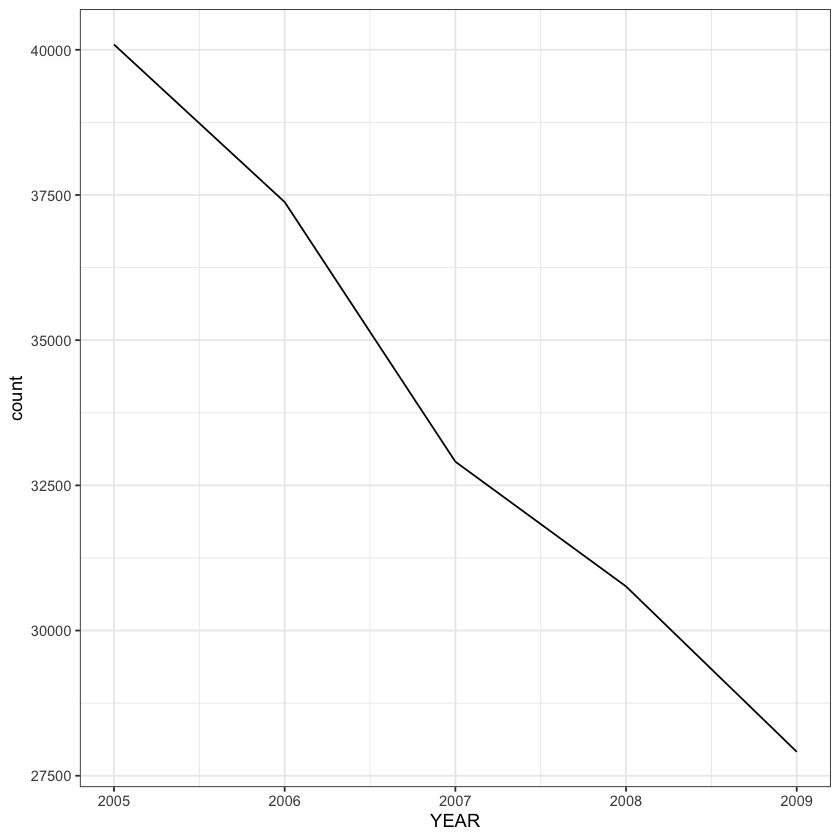

In [41]:
df %>% 
    group_by(YEAR) %>%
    filter(YEAR >= 2005 & YEAR < 2010) %>%
    mutate(count = length(TYPE)) %>%
    ggplot() +
    geom_line(aes(x=YEAR, y=count)) +
    theme_bw()

In [58]:

plot_func <- function(df, start, end, neighbourhood_1, neighbourhood_2, crime, time_scale) {
    
    df <- df %>% filter(YEAR >= start & YEAR <= end)
    
        if (crime == 'ALL') {
            if (neighbourhood_1 == 'ALL') {
                    df1 <- df %>% 
                        group_by({{time_scale}}) %>%
                        mutate(count = length(TYPE))

            } else {
                df1 <- df %>% 
                    filter(NEIGHBOURHOOD == neighbourhood_1) %>%
                group_by({{time_scale}}) %>%
                mutate(count = length(TYPE))
        }   
    } else {
    
    if (neighbourhood_1 == 'ALL') {
                
                df1 <- df %>% 
                filter(TYPE == crime) %>%
                group_by({{time_scale}}) %>%
                mutate(count = length(TYPE))
            
        } else {
            df1 <- df %>% 
                filter((NEIGHBOURHOOD == neighbourhood_1 & TYPE == crime)) %>%
                group_by({{time_scale}}) %>%
                mutate(count = length(TYPE)) 
        
    }
}

    if (crime == 'ALL') {
        if (neighbourhood_2 == 'ALL') {
                
                df2 <- df %>% 
                    group_by({{time_scale}}) %>%
                    mutate(count = length(TYPE))
                
        } else {
            df2 <- df %>% 
                filter(NEIGHBOURHOOD == neighbourhood_2) %>%
                group_by({{time_scale}}) %>%
                mutate(count = length(TYPE))
        }   
    } else {
        
        if (neighbourhood_2 == 'ALL') {
                
                df2 <- df %>% 
                filter(TYPE == crime) %>%
                group_by({{time_scale}}) %>%
                mutate(count = length(TYPE))
            
        } else {
            df2 <- df %>% 
                filter((NEIGHBOURHOOD == neighbourhood_2 & TYPE == crime)) %>%
                group_by({{time_scale}}) %>%
                mutate(count = length(TYPE))
    }
                    }
    ggplot() +
        geom_line(df1, mapping = aes(x={{time_scale}}, y=count), color='blue') +
        geom_line(df2, mapping = aes(x={{time_scale}}, y=count), color='red') +
        ylab('Number of Crimes') +
        ggtitle(paste(neighbourhood_1, "vs", neighbourhood_2, ":", crime))
}

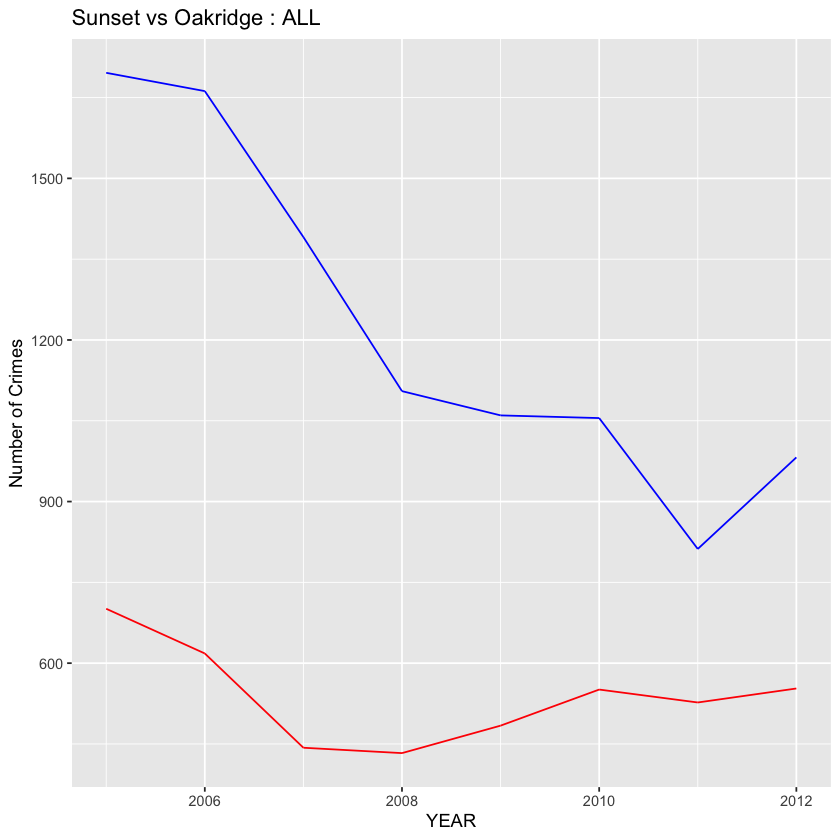

In [59]:
plot_func(df, 2005, 2012, 'Sunset', 'Oakridge', 'ALL', YEAR)